In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#This will ensure that the graph will appear as jupyter notebook frontend and not as image form

In [2]:
#reading the dataset
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#Printing out the column names
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
#Drop the 1st column
#The column name should be passed as list
#axis=1 because we have selected the column to be dropped
#inplace=True because we don't want to change the dataset
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis

In [11]:
#We will now visualize our data
import seaborn as sns

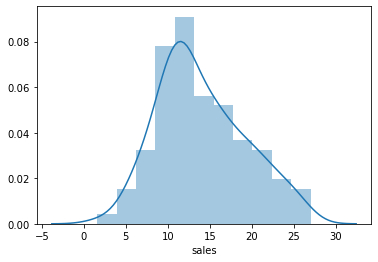

In [12]:
#Plotting the graph for all four columns
sns.distplot(df.sales)

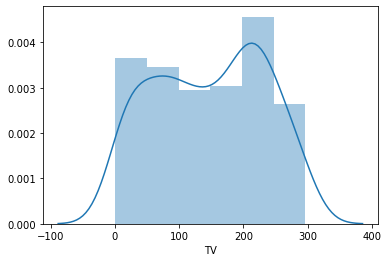

In [13]:
#spend on TV is more
sns.distplot(df.TV)

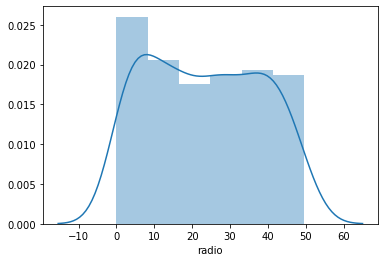

In [14]:
#spend on radio lower than tv
sns.distplot(df.radio)

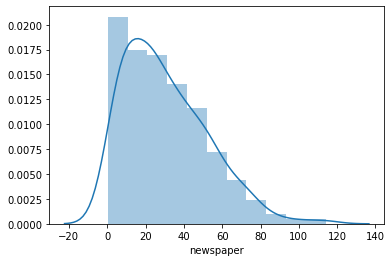

In [15]:
#spend on newspaper lower than TV
sns.distplot(df.newspaper)

# Exploring relationship between predictors and response

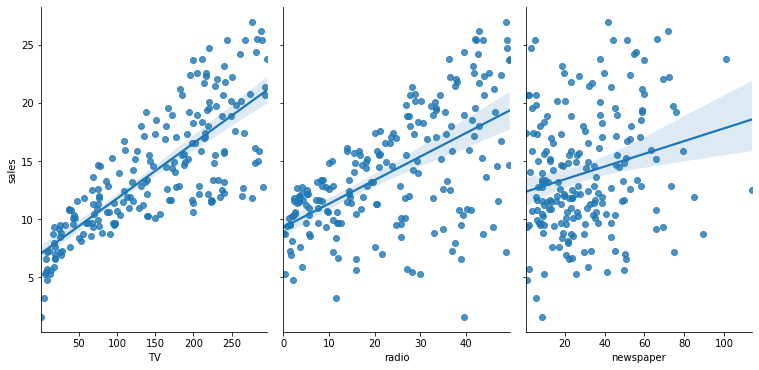

In [20]:
#This method will create the scatter plot
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=5,aspect=0.7,kind='reg')

In [21]:
#look at the correlation between TV and sales
df.TV.corr(df.sales)

0.7822244248616061

In [23]:
#correlation betwwen all columns
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


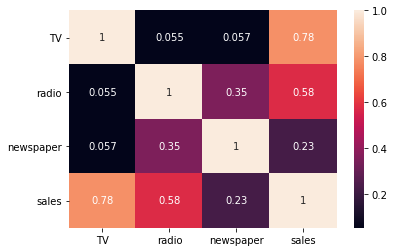

In [24]:
#Plot the heatmap
sns.heatmap(df.corr(),annot=True)

In [26]:
x=df[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [27]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [28]:
y=df.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [35]:
#X_train

In [34]:
#X_test

In [33]:
print(X_train.shape," ",X_test.shape," ",y_train.shape," ",y_test.shape)

(150, 1)   (50, 1)   (150,)   (50,)


In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression()

# Interpreting model coefficient

In [44]:
print(model.coef_," ",model.intercept_)

[0.04802945]   6.9119726188687185


# Making prediction with our model

In [45]:
y_pred=model.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

# Model evaluation metrics

In [47]:
from sklearn import metrics

In [48]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542
